In [1]:
from qiskit import *
import numpy as np

In [2]:
def djoracle(case,n):
# Create oracle in Deutsch-Jozsa alg

    oracle_qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        for quibit in range(n):
            oracle_qc.cx(quibit, n)
    
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle B or C"
    return oracle_gate
    

In [3]:
def dj_algorithm(n, case ="random"):
    dj_circuit = QuantumCircuit(n+1, n)
    
    for quibit in range(n):
        dj_circuit.h(quibit)
    
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    if case == "random":
        random = np.random.randint(2)
        if random == 0:
            case = "constant"
        else:
            case = "balanced"
    
    oracle = djoracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)
    return dj_circuit
        

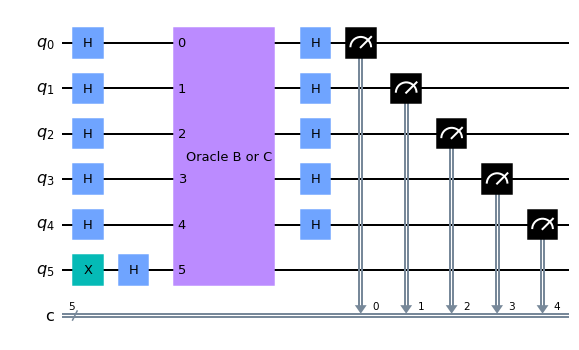

In [4]:
n=5
dj_circuit = dj_algorithm(n,"balanced") # enter "constant" or "balanced"
dj_circuit.draw(output="mpl")

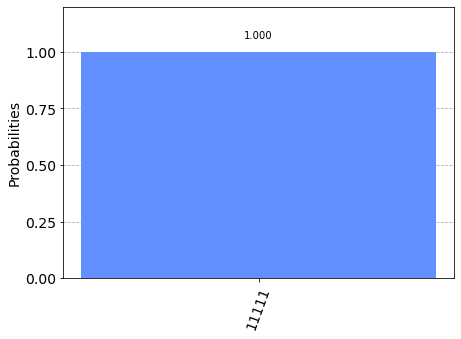

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(dj_circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)